# Classification

- Logistic regression
- K-nearest neighbors
- decision tree classification
- gradient boosted machines

In [1]:
# we import the data
import pandas as pd

data_df = pd.read_csv("./data_classification.csv.zip", index_col=["id"])
data_df

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0
19,0,5,1,4,0,0,0,0,0,1,...,4,2,0,9,0,1,0,1,1,1
20,0,2,1,3,1,0,0,1,0,0,...,3,0,0,10,0,1,0,0,1,0
22,0,5,1,4,0,0,1,0,0,0,...,7,1,3,6,1,0,1,0,1,0
26,0,5,1,3,1,0,0,0,1,0,...,4,2,1,5,0,1,0,0,0,1


In [3]:
data_df.shape

(595212, 58)

In [4]:
data_df["target"].value_counts(normalize=True)

0    0.963552
1    0.036448
Name: target, dtype: float64

In [5]:
data_df_0 = data_df.loc[data_df["target"] == 0].sample(data_df["target"].sum())
data_df_1 = data_df.loc[data_df["target"] == 1]

data_df_sub = pd.concat([data_df_0, data_df_1]).sample(frac=1.)
data_df_sub["target"].value_counts(normalize=True)

1    0.5
0    0.5
Name: target, dtype: float64

## Data preparation

In [6]:
data_df_sub.dtypes.value_counts()

int64      48
float64    10
dtype: int64

In [7]:
data_df_sub.isnull().any()

target            False
ps_ind_01         False
ps_ind_02_cat     False
ps_ind_03         False
ps_ind_04_cat     False
ps_ind_05_cat     False
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_10_bin     False
ps_ind_11_bin     False
ps_ind_12_bin     False
ps_ind_13_bin     False
ps_ind_14         False
ps_ind_15         False
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_reg_01         False
ps_reg_02         False
ps_reg_03         False
ps_car_01_cat     False
ps_car_02_cat     False
ps_car_03_cat     False
ps_car_04_cat     False
ps_car_05_cat     False
ps_car_06_cat     False
ps_car_07_cat     False
ps_car_08_cat     False
ps_car_09_cat     False
ps_car_10_cat     False
ps_car_11_cat     False
ps_car_11         False
ps_car_12         False
ps_car_13         False
ps_car_14         False
ps_car_15         False
ps_calc_01        False
ps_calc_02        False
ps_calc_03        False
ps_calc_04      

In [8]:
## We split the data into train and test

from sklearn.model_selection import train_test_split
y = data_df_sub["target"]
X =  data_df_sub.drop("target", 1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.40,
                                                    random_state=42,
                                                    stratify = y)

In [9]:
print(y_test.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))

1    0.5
0    0.5
Name: target, dtype: float64
1    0.5
0    0.5
Name: target, dtype: float64


## Predictive modeling

In [92]:
# We use logistic regression
from sklearn.linear_model import LogisticRegression

In [93]:
# We fit and we predict

clf = LogisticRegression(n_jobs=-1, C=1e6)
clf.fit(X_train, y_train)

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [94]:
prediction = pd.DataFrame({"y": y_test, "prediction": clf.predict(X_test)})
(prediction["y"] == prediction["prediction"]).mean()

0.58798110163632178

In [95]:
from sklearn import metrics
metrics.accuracy_score(prediction["y"], prediction["prediction"])

0.58798110163632178

In [96]:
## True positive rate
metrics.recall_score(prediction["y"], prediction["prediction"])

0.54563263424752251

In [97]:
## Lets try different classifiers

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

lr_clf = LogisticRegression(n_jobs=-1)
tree_clf = DecisionTreeClassifier(min_samples_leaf=50)
knn_clf = KNeighborsClassifier(n_neighbors=10, weights='distance', n_jobs=-1)
gbm_clf = GradientBoostingClassifier()

In [98]:
lr_clf.fit(X_train, y_train)
tree_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)
gbm_clf.fit(X_train, y_train)

pred_df = pd.DataFrame({"y": y_test,
                        "pred_LR": lr_clf.predict(X_test),
                        "pred_KNN": knn_clf.predict(X_test),
                        "pred_Tree": tree_clf.predict(X_test),
                        "pred_GBM": gbm_clf.predict(X_test)})

In [99]:
pred_df.apply(lambda x: metrics.accuracy_score(pred_df["y"], x)).sort_values(ascending=False)

y            1.000000
pred_GBM     0.596969
pred_LR      0.587463
pred_Tree    0.553929
pred_KNN     0.528175
dtype: float64

## Receiver operating characteristic curve

In [100]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_clf.predict_proba(X_test)[:,1])

pd.DataFrame({"fpr": fpr, "tpr": tpr, "thresholds": thresholds})

,fpr,thresholds,tpr
0,0.000000,0.971739,0.000115
1,0.000000,0.921995,0.000461
2,0.000115,0.917854,0.000461
3,0.000115,0.908752,0.000807
4,0.000346,0.900049,0.000807
5,0.000346,0.897340,0.001152
6,0.000576,0.892359,0.001152
7,0.000576,0.887266,0.001729
8,0.000691,0.887206,0.001729
9,0.000691,0.887198,0.001844


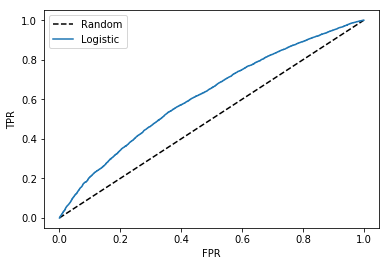

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(fpr, fpr, "k--", label="Random")
plt.plot(fpr, tpr, label="Logistic")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

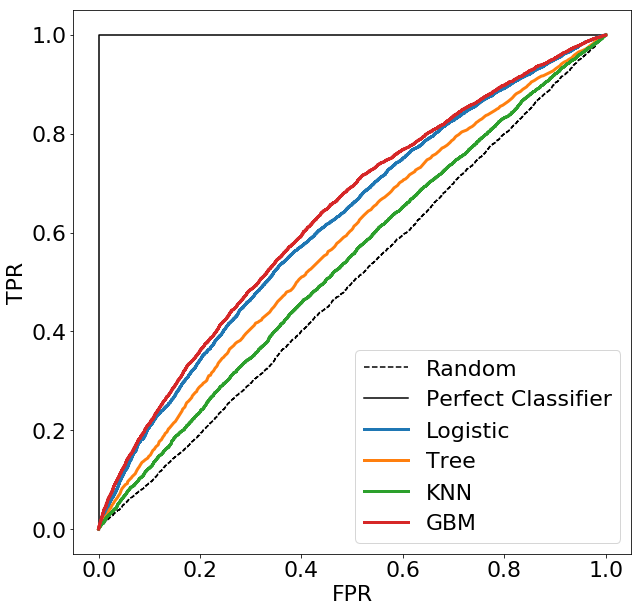

In [102]:
import numpy as np
def plot_ROC(clf, label):
    fpr, tpr, _ = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=label, lw=3)

plt.figure(figsize=(10,10))
fpr, tpr, _ = metrics.roc_curve(y_test, np.random.randn(y_test.shape[0]))
plt.plot(fpr, tpr, "k--", label="Random")
fpr, tpr, _ = metrics.roc_curve(y_test, y_test + 1e-6*np.random.randn(y_test.shape[0]))
plt.plot(fpr, tpr, "k-", label="Perfect Classifier")
plot_ROC(lr_clf, "Logistic")
plot_ROC(tree_clf, "Tree")
plot_ROC(knn_clf, "KNN")
plot_ROC(gbm_clf, "GBM")

plt.xlabel("FPR",fontsize=22)
plt.ylabel("TPR",fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22)

In [103]:
pred_df2 = pd.DataFrame({"y": y_test,
                        "pred_LR": lr_clf.predict_proba(X_test)[:,1],
                        "pred_KNN": knn_clf.predict_proba(X_test)[:,1],
                        "pred_Tree": tree_clf.predict_proba(X_test)[:,1],
                        "pred_GBM": gbm_clf.predict_proba(X_test)[:,1]})
pred_df2

,pred_GBM,pred_KNN,pred_LR,pred_Tree,y
id,,,,,
488205,0.596459,0.393779,0.556224,0.698630,0
503552,0.407989,0.199072,0.333214,0.430233,0
3565,0.636912,0.298874,0.546432,0.288136,1
23989,0.405204,0.396984,0.439993,0.515789,1
1137516,0.645836,0.805907,0.757498,0.677778,0
866806,0.446770,0.203320,0.486031,0.300000,0
772960,0.619273,0.591713,0.603304,0.457447,0
1212246,0.511005,0.613758,0.451937,0.684932,0
1215466,0.509849,0.292973,0.428597,0.666667,1


In [104]:
pred_df2.apply(lambda x: metrics.roc_auc_score(pred_df2["y"], x)).sort_values(ascending=False)

y            1.000000
pred_GBM     0.632927
pred_LR      0.618037
pred_Tree    0.575829
pred_KNN     0.537568
dtype: float64

In [105]:
pred_df2.apply(lambda x: x.nunique())

pred_GBM     17355
pred_KNN     17287
pred_LR      17356
pred_Tree      318
y                2
dtype: int64

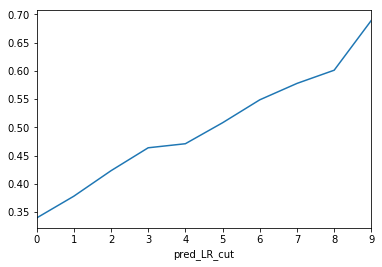

In [106]:
temp = pred_df2.copy()
temp["pred_LR_cut"] = pd.qcut(temp["pred_LR"], 10, labels=False)
temp.groupby("pred_LR_cut")["y"].mean().plot()

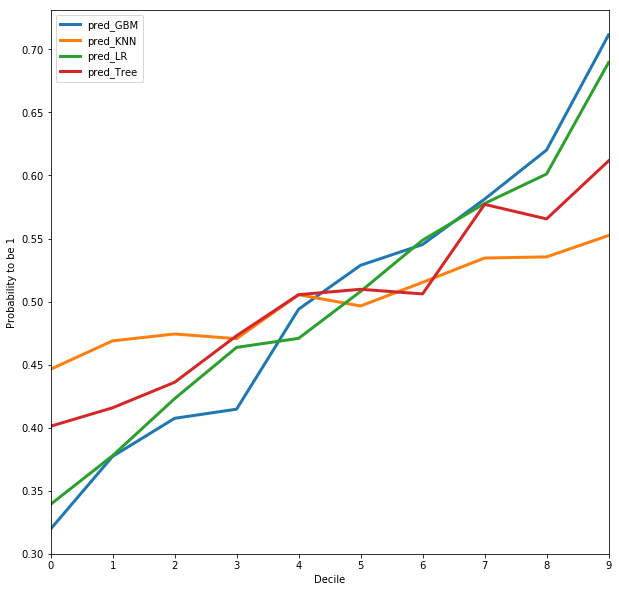

In [107]:
def plot_deciles(col):
    temp = pred_df2.copy()
    temp["Decile"] = pd.qcut(temp[col], 10, labels=False, duplicates="drop")
    temp.groupby("Decile")["y"].mean().plot(label=col, lw=3)

plt.figure(figsize=(10,10))
pred_df2.drop("y", 1).columns.map(plot_deciles) 
plt.ylabel("Probability to be 1")
plt.legend()

## Optimize the model complexity

In [108]:
## let adjust the regulation parameter in Logistic Regression

lr_clf = LogisticRegression(penalty='l2')

Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

df_auc = pd.DataFrame(index=Cs, columns=["AUC_test", "AUC_train"])

for c in Cs:
    lr_clf.set_params(C=c)
    lr_clf.fit(X_train, y_train)
    y_estimated_train = lr_clf.predict_proba(X_train)[:,1]
    y_estimated_test = lr_clf.predict_proba(X_test)[:,1]
    auc_train = metrics.roc_auc_score(y_train, y_estimated_train)
    auc_test = metrics.roc_auc_score(y_test, y_estimated_test)
    df_auc.loc[c, :] = [auc_test, auc_train] 

(0.61, 0.63)

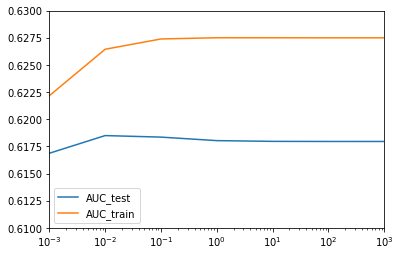

In [110]:
import matplotlib.pyplot as plt
df_auc.plot(logx=True)
plt.ylim(0.61, 0.63)

In [111]:
lr_clf = LogisticRegression(penalty='l2')

Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

df_mse = pd.DataFrame(index=Cs, columns=["MSE_test", "MSE_train"])

for c in Cs:
    lr_clf.set_params(C=c)
    lr_clf.fit(X_train, y_train)
    y_estimated_train = lr_clf.predict(X_train)
    y_estimated_test = lr_clf.predict(X_test)
    mse_train = metrics.mean_squared_error(y_train, y_estimated_train)
    mse_test = metrics.mean_squared_error(y_test, y_estimated_test)
    df_mse.loc[c, :] = [mse_test, mse_train] 

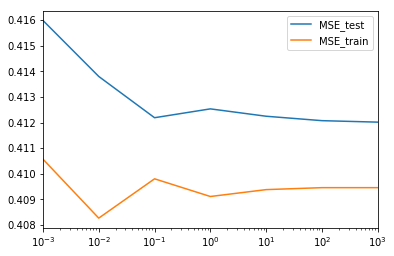

In [112]:
df_mse.plot(logx=True)

## K-fold crossvalidation

In [117]:
from sklearn.linear_model import LogisticRegressionCV

lrcv_clf = LogisticRegressionCV(scoring="roc_auc", cv=10, Cs=100, n_jobs=-1)

lrcv_clf.fit(X_train, y_train)

LogisticRegressionCV(Cs=100, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
           refit=True, scoring='roc_auc', solver='lbfgs', tol=0.0001,
           verbose=0)

In [118]:
df_auccv = pd.DataFrame(lrcv_clf.scores_[1], columns=lrcv_clf.Cs_).transpose()
df_auccv

,0,1,2,3,4,5,6,7,8,9
0.000100,0.595253,0.591995,0.588277,0.606935,0.613193,0.593771,0.611366,0.614744,0.613252,0.588908
0.000120,0.596742,0.593680,0.590145,0.608710,0.613789,0.596705,0.612831,0.616941,0.615061,0.590788
0.000145,0.598370,0.595222,0.591812,0.610481,0.614527,0.599505,0.614105,0.619061,0.616836,0.592434
0.000175,0.600105,0.596684,0.593361,0.612320,0.615346,0.602401,0.615306,0.621174,0.618470,0.594131
0.000210,0.601535,0.597874,0.594747,0.614293,0.616126,0.605078,0.616388,0.623089,0.619991,0.595889
0.000254,0.603045,0.599012,0.595885,0.616049,0.616660,0.607520,0.617448,0.624886,0.621333,0.597540
0.000305,0.604586,0.600108,0.596898,0.617699,0.617280,0.609831,0.618188,0.626577,0.622613,0.599019
0.000368,0.605928,0.601106,0.597687,0.619343,0.617929,0.611971,0.618791,0.628079,0.623634,0.600475
0.000443,0.607303,0.601956,0.598370,0.620873,0.618516,0.613981,0.619303,0.629510,0.624668,0.601956
0.000534,0.608695,0.602640,0.598924,0.622341,0.619086,0.615873,0.619549,0.630593,0.625558,0.603325


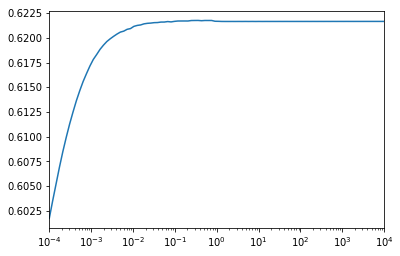

In [122]:
df_auccv.mean(1).plot(logx=True)

In [121]:
lrcv_clf.C_

array([ 0.35938137])

In [123]:
df_auccv.mean(1).argmax()

0.35938136638046292

In [124]:
y_estimated_test = lrcv_clf.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test, y_estimated_test)

0.61847358099606409

## Other functions to tune models

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

knn_clf = KNeighborsClassifier()

In [39]:
## grid search

param_grid = {
    "n_neighbors": range(1,6),
    "weights": ['uniform', 'distance'],
    "p": [1,2],   
}

grid = GridSearchCV(knn_clf, param_grid=param_grid, scoring="roc_auc", n_jobs=-1, cv=3, verbose=1)

grid.fit(X_train, y_train)

NameError: name 'knn_clf' is not defined

In [128]:
grid.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [129]:
grid.best_score_

0.54403139613801643

In [130]:
grid.cv_results_

{'mean_fit_time': array([ 0.07095599,  0.09846481,  0.10339157,  0.10242407,  0.10073074,
         0.10318867,  0.09563073,  0.09773763,  0.10865227,  0.10071739,
         0.10164038,  0.09858807,  0.10966682,  0.09556119,  0.10015965,
         0.09237409,  0.10750031,  0.09379371,  0.09367228,  0.13767401]),
 'mean_score_time': array([ 11.21379908,  11.2164739 ,   4.14625406,   4.55306427,
         12.7555209 ,  12.71784894,   5.04116273,   5.03834637,
         13.55072363,  13.52617335,   5.61028004,   5.1005079 ,
         13.39526049,  13.38563546,   5.24519507,   5.21621656,
         13.62568069,  13.67794506,   5.43430042,   5.31508191]),
 'mean_test_score': array([ 0.52243393,  0.52243393,  0.52085894,  0.52085894,  0.52709946,
         0.52865191,  0.52589892,  0.52797046,  0.53216938,  0.53325061,
         0.53009314,  0.53215811,  0.5382072 ,  0.53876022,  0.53318548,
         0.53494455,  0.54381218,  0.5440314 ,  0.53473802,  0.53624631]),
 'mean_train_score': array([ 1.    

In [136]:
y_estimated_test = grid.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test, y_estimated_test)

0.53673698158079064

In [14]:
## randomSearch
from sklearn.ensemble import GradientBoostingClassifier
from scipy import stats

param_distributions = {
    "learning_rate": stats.uniform(0.0001, 0.5),
    "n_estimators": stats.randint(100, 500),
    "max_depth": stats.randint(2, 20),
    "min_samples_split": stats.uniform(0, 1),
    "min_samples_leaf": stats.uniform(0, 0.5),
    "min_weight_fraction_leaf": stats.uniform(0, 0.5),
    "subsample":stats.uniform(0.2, 0.8),
    "max_leaf_nodes": stats.randint(4, 1000)    
}

gbm_clf = GradientBoostingClassifier()

r_grid = RandomizedSearchCV(gbm_clf, 
                            param_distributions=param_distributions,
                            cv=3,
                            n_jobs=-1,
                            n_iter=10,
                            verbose=1)

r_grid.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.8s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x112ae6ac8>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x112ae6cf8>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x112ae6ef0>, 'min_samples_split': <scip...0x112af4c50>, 'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x112af4eb8>},
          pre_dispatch='2*n_jo

In [15]:
r_grid.best_params_

{'learning_rate': 0.16976021562505983,
 'max_depth': 18,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 0.00018352941665167322,
 'min_samples_split': 0.25351888452831606,
 'min_weight_fraction_leaf': 0.29773983618154881,
 'n_estimators': 317,
 'subsample': 0.32645236454777427}

In [16]:
r_grid.best_score_

0.57732790411800861

In [17]:
y_estimated_test = r_grid.predict_proba(X_test)[:,1]

In [19]:
from sklearn import metrics
metrics.roc_auc_score(y_test, y_estimated_test)

0.60493536091217459

## Variable importance

In [21]:
gbm_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

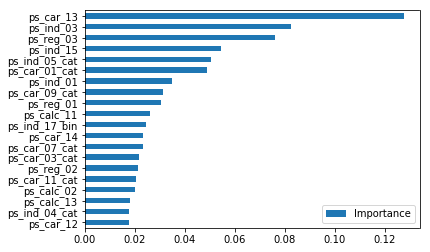

In [28]:
%matplotlib inline

var_imp = pd.DataFrame({"Importance": gbm_clf.feature_importances_}, index=X_train.columns)
var_imp.sort_values("Importance").iloc[-20:].plot(kind="barh")

In [29]:
var_imp.sort_values("Importance").iloc[-20:]

,Importance
ps_car_12,0.017706
ps_ind_04_cat,0.017744
ps_calc_13,0.018123
ps_calc_02,0.019916
ps_car_11_cat,0.020701
ps_reg_02,0.021445
ps_car_03_cat,0.021882
ps_car_07_cat,0.023362
ps_car_14,0.023410
ps_ind_17_bin,0.024401


In [35]:
data_df_sub.groupby("target")["ps_car_13"].mean()

target
0    0.813125
1    0.875505
Name: ps_car_13, dtype: float64

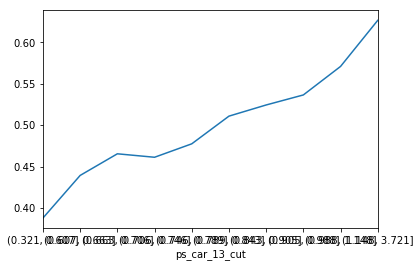

In [38]:
data_df_sub["ps_car_13_cut"] = pd.qcut(data_df_sub["ps_car_13"], 10)
data_df_sub.groupby("ps_car_13_cut")["target"].mean().plot()